In [6]:
import pandas as pd
import keras
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import re

In [265]:
url = 'https://raw.githubusercontent.com/danielding186/StockPrediction/26bc55f963f3d660017e4921032fed54234f1164/Combined_News_DJIA.csv'
url1 = 'https://raw.githubusercontent.com/danielding186/StockPrediction/master/RedditNews.csv'

In [266]:
Newsdf=pd.read_csv(url)
#Newsdf1=pd.read_csv(url1)

In [267]:
print(Newsdf.shape)
#print(Newsdf1.shape)

(1989, 27)


In [268]:
Newsdf.head()

Date  LabelNew                                               Top1  \
0   8/8/08         0  b"Georgia 'downs two Russian warplanes' as cou...   
1  8/11/08         0  b'Why wont America and Nato help us? If they w...   
2  8/12/08         0  b'Remember that adorable 9-year-old who sang a...   
3  8/13/08         1  b' U.S. refuses Israel weapons to attack Iran:...   
4  8/14/08         0  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  \
0  b"The 'enemy combatent' trials are nothing but...   
1  b'An American citizen living in S.Ossetia blam...   
2  b"I'm Trying to Get a Sense of This Whole Geor...   
3             b'Russian forces sink Georgian ships '   
4  b'Will the Russians conquer Tblisi? Bet on it,...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev ac

In [257]:
Newsdf.sort_values(by=['Date'],ascending=False)

In [259]:
#News=NewsNews.reset_index(drop=False)
#News.drop(['index'],axis=1)
Newsdf.head()


Date  LabelNew                                               Top1  \
1783  9/9/15         0  Sometimes, 7-8 men raped us in one daywe thoug...   
1531  9/9/14         1  New Report: World Leaders Call For Ending Crim...   
1279  9/9/13         0  Norway Has More Money Than It Knows What To Do...   
778   9/9/11         1  Turkish Prime Minister: Turkish navy will esco...   
525   9/9/10         0  Afghan insurgents give captive reporter a cell...   

                                                   Top2  \
1783  Japanese group sues to stop TPP talks - A grou...   
1531  Another victory for Kim Dotcom, he's getting a...   
1279  Obama's top aide: We lack 'irrefutable, beyond...   
778   Vancouver lawyer Gail Davidson seeks Dick Chen...   
525   Terrorism : Suicide attack in Russia kills 15,...   

                                                   Top3  \
1783  UK Parliament to debate "making the production...   
1531  ISIS Kidnaps 50 Civilians After They Burn Isla...   
1279  A 58-year-old Uruguayan man who disappeared fo...   
778   An 85-year-old World War II veteran who was ja...   
525   Olympic Disaster in Vancouver, Taxpayers on Ho...   

                                                   Top4  \
1783  Saudi Arabian diplomat accused of raping Nepal...   
1531  MH17 crash: Dutch experts say numerous objects...   
1279  Why Dubai's Islamic Austerity is a Sham, Coupl...   
778   Magnitude 6.7 Quake Hits Vancouver Island, Canada   
525              Anti-Israel boycotts are gaining speed   

                                                   Top5  \
1783  S. Korea dedicates $100 million to help poor c...   
1531  Russian agents raiding homes of Muslims in Crimea   
1279  Obama Administration Denies AP Requests For Sy...   
778   Nato-led forces killed BBC reporter in Afghani...   
525   What America Left Behind in Iraq - It's even u...   

                                                   Top6  \
1783  Indian police say they have rescued 2 Nepali w...   
1531  2,300 year old mysterious tomb discovered in A...   
1279  'Saddam used chemical weapons on Iran with no ...   
778   A U.S. military plane was forced down by a Nor...   
525   UK MPs 'were too scared to testify in court' a...   

                                                   Top7  \
1783  Hungarian nationalist TV camera operator filme...   
1531  Russia Reports Troop Deaths In Ukraine, But Ca...   
1279     Russia urges Assad to give up chemical weapons   
778   Food Emergency: How the World Bank &amp; IMF H...   
525   Merkel to honor Mohammed cartoonist at press a...   

                                                   Top8  \
1783  Frankenvirus Emerges From Siberia's Frozen Was...   
1531  Steven Sotloff Was Sold To ISIS By 'Moderate' ...   
1279  France strengthens separation of Church and St...   
778   Australopithecus sediba skeletons found at the...   
525                   How could this POSSIBLY go wrong?   

                            ...                          \
1783                        ...                           
1531                        ...                           
1279                        ...                           
778                         ...                           
525                         ...                           

                                                  Top16  \
1783        Germany promises 50 Mbps broadband for all.   
1531  6 Elephant Poachers Caught in Mozambique Reser...   
1279  Assad Tells PBS' Charlie Rose Syria Prepared t...   
778   Russia pins Soyuz failure to production line d...   
525   Creepy Biometric IDs to Be Forced Onto India's...   

                                                  Top17  \
1783  Australia to accept additional 12,000 Syrian r...   
1531  ISIS-Affiliated Twitter Account Calls For Assa...   
1279  The U.S. government tapped into computer netwo...   
778   Anti-Israel sentiment high in Egypt: But now, ...   
525   \rRomania attempts to tax witches and fortune ...

In [252]:
Newsdf.reset_index(drop=True,inplace=True)
Newsdf

Date  LabelNew                                               Top1  \
0      9/9/15         0  Sometimes, 7-8 men raped us in one daywe thoug...   
1      9/9/14         1  New Report: World Leaders Call For Ending Crim...   
2      9/9/13         0  Norway Has More Money Than It Knows What To Do...   
3      9/9/11         1  Turkish Prime Minister: Turkish navy will esco...   
4      9/9/10         0  Afghan insurgents give captive reporter a cell...   
5      9/9/09         0  b'British nurse who was struck off the registe...   
6      9/9/08         1  b'I love the world: Thai Prime Minister Samak ...   
7      9/8/15         0  Homeopathy conference in Germany ends in chaos...   
8      9/8/14         1  A Chinese boy has made the discovery of lifeti...   
9      9/8/11         1  The lifetime ban on blood donations by homosex...   
10     9/8/10         0  "For them, there is no safe place. They are ra...   
11     9/8/09         0  b'Israel\'s army is changing. Once proudly sec...   
12     9/8/08         0  b'A French judge has ordered two branches of S...   
13     9/7/12         0  Afghan actress stabbed to death by male mob fo...   
14     9/7/11         0  WikiLeaks: Every law proposal, every ordinance...   
15     9/7/10         0  Two redditors are climbing Mt. Kilimanjaro for...   
16     9/6/13         0  New documentary shows how televangelist Pat Ro...   
17     9/6/12         0  Evangelical Christian doctor in Australia bann...   
18     9/6/11         0           Turkish PM suspends all ties with Israel   
19     9/5/14         0  After convincing China to give up shark fin so...   
20     9/5/13         0  36 hours before the Australian election and in...   
21     9/5/12         1  'I couldn't believe CNN was making me put what...   
22     9/5/08         1  b'In Jordan, the honor killings that are not: ...   
23     9/4/15         1  Jordan has a population of 6 million, but have...   
24     9/4/14         0  Russia warns NATO not to offer membership to U...   
25     9/4/13         0  All major commercial TV networks in Australia ...   
26     9/4/12         1  A virus that eats cancer, Cheap to \rproduce, ...   
27     9/4/09         0  b'A six-year-old girl has become a media darli...   
28     9/4/08         1  b'Security guards beat man at soccer (football...   
29    9/30/15         0  Germany has translated the first 20 articles o...   
...       ...       ...                                                ...   
1959  1/15/09         0  b'Vatican reveals list of worst sins. Desecrat...   
1960  1/14/16         1  No. of crimes in Japan falls to postwar low in...   
1961  1/14/15         1        Cameroon Army Kills 143 Boko Haram Fighters   
1962  1/14/14         1  Mozilla Calls On World To Protect Firefox Brow...   
1963  1/14/13         0  German govt  unexpectedly offers Paris concret...   
1964  1/14/11         0  Haiti reconstruction firms only get $1.60 for ...   
1965  1/14/10         1  b'"It never ceases to amaze me that in times o...   
1966  1/14/09         1  b"UN headquarters in Gaza hit by Israeli 'whit...   
1967  1/13/16         1  Explosions heard in Indonesian capital - in Ja...   
1968  1/13/15         1  China has just banned the burqa in its biggest...   
1969  1/13/14         1  A broad coalition of well-known organizations ...   
1970  1/13/12         1  Scotland Yard Report Finds British Citizen Was...   
1971  1/13/11         0  Aussie here: Just want everyone to know that B...   
1972  1/13/10         0  b'Please go to www.redcross.org and donate at ...   
1973  1/13/09         1       b'Greece hinders US arms delivery to Israel'   
1974  1/12/16         0  Oil Falls Below $30/Barrel for First Time Sinc...   
1975  1/12/15         1  World's largest indoor farm in Japan is 100 ti...   
1976  1/12/12         1  Loggers in Brazil captured an eight-year-old g...   
1977  1/12/11         1  West African farmers have succeeded in cutting...   
1978  1/12/10         1  b'Dear

In [269]:
#checking for null values
Newsdf.isnull().sum()

Date        0
LabelNew    0
Top1        0
Top2        0
Top3        0
Top4        0
Top5        0
Top6        0
Top7        0
Top8        0
Top9        0
Top10       0
Top11       0
Top12       0
Top13       0
Top14       0
Top15       0
Top16       0
Top17       0
Top18       0
Top19       0
Top20       0
Top21       0
Top22       0
Top23       1
Top24       3
Top25       3
dtype: int64

In [270]:
Newsdf[Newsdf.isnull().any(axis=1)]

Date  LabelNew                                               Top1  \
277   9/15/09         1  b'The Church of Scientology won\'t be dissolve...   
348  12/24/09         0  b'Woman knocks down Pope Benedict at Christmas...   
681   4/21/11         0  Director of "Restrepo" and Photographer Chris ...   

                                                  Top2  \
277  b'New virus from rats can kill 80 per cent of ...   
348  b'Ugandan President Museveni says he will bloc...   
681  Everyone within 20km of Fukushima will be forc...   

                                                  Top3  \
277  b'The gruesome spectacle of dolphins being sla...   
348  b"Venezuela's Chavez threatens to kick out car...   
681  Bahrain: Activist Zaynab Al-Khawaja's letter t...   

                                                  Top4  \
277  b'The End of Innocence in Afghanistan: \'The G...   
348  b'Woman who knocked down pope had pasta in her...   
681  More than 80,000 people are claiming incapacit...   

                                                  Top5  \
277            b'France approves Internet piracy bill'   
348  b'450 people from 21 countries, including 30 f...   
681  Libya: 'mission creep' claims as UK sends in m...   

                                                  Top6  \
277  b'The Rural Doctors Association says right now...   
348  b'Chvez declares Angel Falls is no more: World...   
681  Japan considers banning access to evacuation zone   

                                                  Top7  \
277  b'Al Jazeera English - Africa - Shabab to aven...   
348             b'Drug tests catch out 10 police (UK)'   
681  Chinese oil giant Sinopec has stopped exportin...   

                                                  Top8  ...   \
277  b"How Sri Lanka governs through detentions - S...  ...    
348  b'Once the worlds fourth-largest lake, the Ara...  ...    
681  6.0-magnitude earthquake strikes off east coas...  ...    

                                                 Top16  \
277  b'In an equine echo of the controversy surroun...   
348  b'Pig farts spark Australia gas scare - I shit...   
681  Russian migration official fired in racism row...   

                                                 Top17  \
277  b'UPDATE: 5-New York homes raided in terrorism...   
348  b'Bin Laden daughter flees to Saudi embassy in...   
681  Small amounts of radioactive iodine found in b...   

                                                 Top18  \
277  b'Population Growth Impeding Progress on the M...   
348  b'Traumatic Brain Injuries:  Growing evidence ...   
681  War photographer, Oscar-nominated film directo...   

                                                 Top19  \
277    b'Global Population to Reach 7 Billion by 2011'   
348  b'The Pakistan Supreme Court has ordered the P...   
681  Effeminate boys are being sent to a special ca...   

                                                 Top20  \
277                b'Government Funded Feminist Porn '   
348  b"Here's a video the Taliban released this mor...   
681  Japan Government Declares 12-Mile Area Around ...   

                                                 Top21  \
277  b'Can someone enlighten me re:Holy Land disput...   
348               b'Fireworks set off aboard airliner'   
681  TEPCO admitted Wednesday that nuclear fuel in ...   

                                                 Top22  \
277  b'Human Rights Watch official suspended for co...   
348  b'Five VA men may face terrorism charges, Paki...   
681  Fukushima evacuees face arrest if they return ...   

                                                 Top23 Top24 Top25  
277                                                NaN   NaN   NaN  
348  b"Ayatollah Montazeri's Legacy:  In death he m...   NaN   NaN  
681          Prince Charles wins some kind of a record   NaN   NaN  

[3 rows x 27 columns]

In [273]:
Newsdf=Newsdf.dropna(axis = 0, how ='any')

In [274]:
Newsdf.isnull().sum()

Date        0
LabelNew    0
Top1        0
Top2        0
Top3        0
Top4        0
Top5        0
Top6        0
Top7        0
Top8        0
Top9        0
Top10       0
Top11       0
Top12       0
Top13       0
Top14       0
Top15       0
Top16       0
Top17       0
Top18       0
Top19       0
Top20       0
Top21       0
Top22       0
Top23       0
Top24       0
Top25       0
dtype: int64

In [275]:
Newsdf['FullNews'] = Newsdf[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25']].apply(lambda x: ' '.join(x), axis = 1)
                            
                            

In [276]:
#Top 22 headlines per day 
NewsFull=Newsdf.drop(['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)
NewsFull
             

Date  LabelNew                                           FullNews
0      8/8/08         0  b"Georgia 'downs two Russian warplanes' as cou...
1     8/11/08         0  b'Why wont America and Nato help us? If they w...
2     8/12/08         0  b'Remember that adorable 9-year-old who sang a...
3     8/13/08         1  b' U.S. refuses Israel weapons to attack Iran:...
4     8/14/08         0  b'All the experts admit that we should legalis...
5     8/15/08         0  b"Mom of missing gay man: Too bad he's not a 2...
6     8/18/08         1  b'In an Afghan prison, the majority of female ...
7     8/19/08         1  b"Man arrested and locked up for five hours af...
8     8/20/08         1  b'Two elderly Chinese women have been sentence...
9     8/21/08         0  b"British resident held in Guantanamo Bay wins...
10    8/22/08         0  b'Syria says its ready to put a Russian missil...
11    8/25/08         1  b"N Korea's Kim died in 2003; replaced by look...
12    8/26/08         1  b'North Korea halts denuclearisation after US ...
13    8/27/08         1  b'Photos of a 15-year-old Iraqi suicide bomber...
14    8/28/08         0  b"Military help for Georgia is a 'declaration ...
15    8/29/08         1  b'Russian Prime Minister Vladimir Putin has ac...
16     9/2/08         1  b"A girl filmed Israeli soldiers' brutality. S...
17     9/3/08         1  b'Poland Legalization of Marijuana - two majou...
18     9/4/08         1  b'Security guards beat man at soccer (football...
19     9/5/08         1  b'In Jordan, the honor killings that are not: ...
20     9/8/08         0  b'A French judge has ordered two branches of S...
21     9/9/08         1  b'I love the world: Thai Prime Minister Samak ...
22    9/10/08         1  b'Dutch to ban burkas when picking children up...
23    9/11/08         1  b'American intelligence confirms that the late...
24    9/12/08         0  b"OPEC finished??  Saudi Arabia says 'LATER!'"...
25    9/15/08         1  b'Did Saakashvili Lie?: The West Begins to Dou...
26    9/16/08         0  b"Pakistani Tribesmen Representing Half A Mill...
27    9/17/08         1  b'Attack on US embassy in Yemen leaves 16 dead...
28    9/18/08         1  b'6,200 babies sick: Milk scandal spreading ' ...
29    9/19/08         0  b'Brits take a stand - ban short-selling of fi...
...       ...       ...                                                ...
1959  5/20/16         0  LinkedIn just revealed that the 2012 breach th...
1960  5/23/16         1  'It keeps happening,' rape survivor says: Prot...
1961  5/24/16         1  Colombia has fired more than 1000 police offic...
1962  5/25/16         0  Adidas shoe manufacture returns to Germany, fu...
1963  5/26/16         0  Greek news sites are reporting that Aristotle'...
1964  5/27/16         0  Thailand has shut down 10 popular diving sites...
1965  5/31/16         0  Every reference to the Great Barrier Reef remo...
1966   6/1/16         0  Forty tiger cub bodies have been found in a fr...
1967   6/2/16         0  Germany recognizes the Armenian Genocide Media...
1968   6/3/16         0  A seven-year-old boy who went missing in bear-...
1969   6/6/16         1  Nearly 60% of Qatar population live in 'labour...
1970   6/7/16         1  Five Men in India Have Been Convicted for the ...
1971   6/8/16         1  UN Removes Saudi Arabia From Human Rights Blac...
1972   6/9/16         0  Vandals Destroy 8,000-Yr-Old Aboriginal Artwor...
1973  6/10/16         1  U.N. Chief Admits He Removed Saudi Arabia From...
1974  6/13/16         1  A Dutch woman who alleged she was raped after ...
1975  6/14/16         0  Gay Chinese man sues mental hospital for tryin...
1976  6/15/16         0  ISIS Twitter accounts have been hijacked with ...
1977  6/16/16         1  Decriminalisation Call As 'War On Drugs' Fails...
1978  6/17/16         1  MP Jo Cox dead after shooting attack Saudi Ara...
1979  6/20/16         1  A staggering 87 percent of Venezuelans say the...
1980  6/21/16         0  An Austra

In [294]:
NewsFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1988
Data columns (total 4 columns):
Date        1986 non-null object
LabelNew    1986 non-null int64
FullNews    1986 non-null object
tokens      1986 non-null object
dtypes: int64(1), object(3)
memory usage: 77.6+ KB


In [304]:
#cleaning data 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

NewsFull.FullNews= NewsFull.FullNews.apply(lambda x: x.lower())
from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsFull.FullNews.apply(lambda x: [item for item in x if item not in stop])

NewsFull["tokens"] = NewsFull["FullNews"].apply(tokenizer.tokenize)

NewsFull.head()

Date  LabelNew                                           FullNews  \
0   8/8/08         0  b'b"georgia \'downs two russian warplanes\' as...   
1  8/11/08         0  b'b\'why wont america and nato help us? if the...   
2  8/12/08         0  b'b\'remember that adorable 9-year-old who san...   
3  8/13/08         1  b'b\' u.s. refuses israel weapons to attack ir...   
4  8/14/08         0  b'b\'all the experts admit that we should lega...   

                                              tokens  
0  [b, b, georgia, downs, two, russian, warplanes...  
1  [b, b, why, wont, america, and, nato, help, us...  
2  [b, b, remember, that, adorable, 9, year, old,...  
3  [b, b, u, s, refuses, israel, weapons, to, att...  
4  [b, b, all, the, experts, admit, that, we, sho...

In [305]:
#inspecting data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in NewsFull["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in NewsFull["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

913679 words total, with a vocabulary size of 35269
Max sentence length is 760


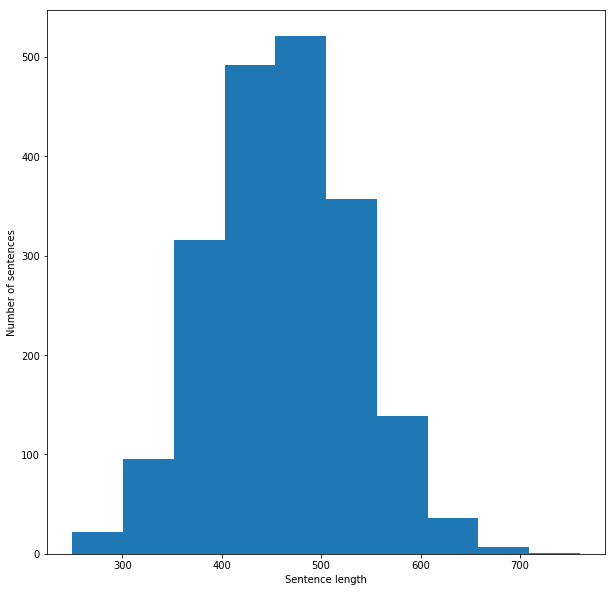

In [306]:
#visualizing above

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

# Bag of Words Counts #

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = NewsFull["FullNews"].tolist()
list_labels = NewsFull["LabelNew"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

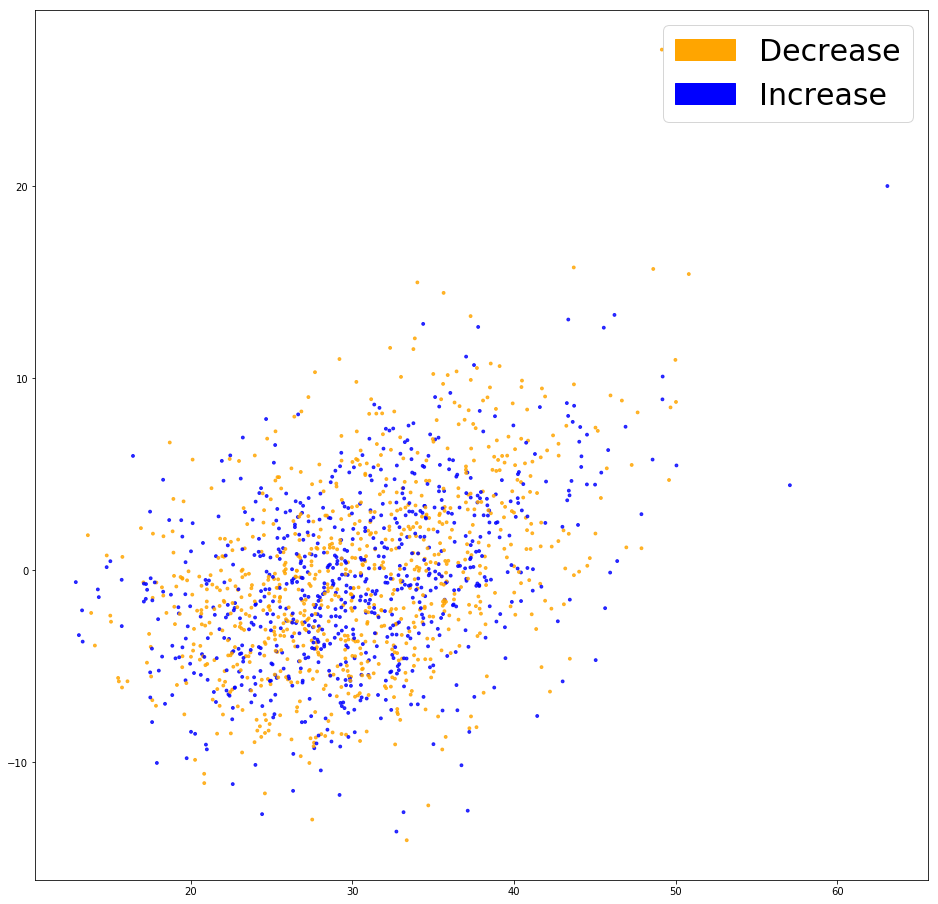

In [308]:
#visualizing
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Decrease')
            green_patch = mpatches.Patch(color='blue', label='Increase')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()


These embeddings don't look very cleanly separated. Let's see if we can still fit a useful model on them.

Fitting a classifier
Starting with a logistic regression is a good idea. It is simple, often gets the job done, and is easy to interpret.

In [309]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

Evaluation
Let's start by looking at some metrics to see if our classifier performed well at all.

In [310]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.503, precision = 0.501, recall = 0.503, f1 = 0.500



Inspection
A metric is one thing, but in order to make an actionnable decision, we need to actually inspect the kind of mistakes our classifier is making. Let's start by looking at the confusion matrix.

In [311]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_counts)

print(cm)

[[117  89]
 [109  83]]


In [312]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [313]:
importance

{0: {'tops': [(0.3756611973852223, '200'),
   (0.3814220890815395, 'blood'),
   (0.4020479142185525, 'operations'),
   (0.40780723629113924, 'approves'),
   (0.41494722166307724, 'tells'),
   (0.4154180434436075, 'running'),
   (0.4170143144686735, 'send'),
   (0.43722265182605713, 'him'),
   (0.4399925358595077, 'base'),
   (0.5648437834396449, 'scandal')],
  'bottom': [(-0.4014640216395509, 'data'),
   (-0.4096259795409857, 'northern'),
   (-0.41084020146519246, 'buying'),
   (-0.41585755967911664, 'family'),
   (-0.41697127310749527, 'australian'),
   (-0.4183838884328008, 'cities'),
   (-0.43093368106992264, 'armed'),
   (-0.43977861635213134, 'mumbai'),
   (-0.46173897149790705, 'becoming'),
   (-0.5125279036920874, 'shows')]}}

In [314]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
  
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Decrease', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Increase', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()



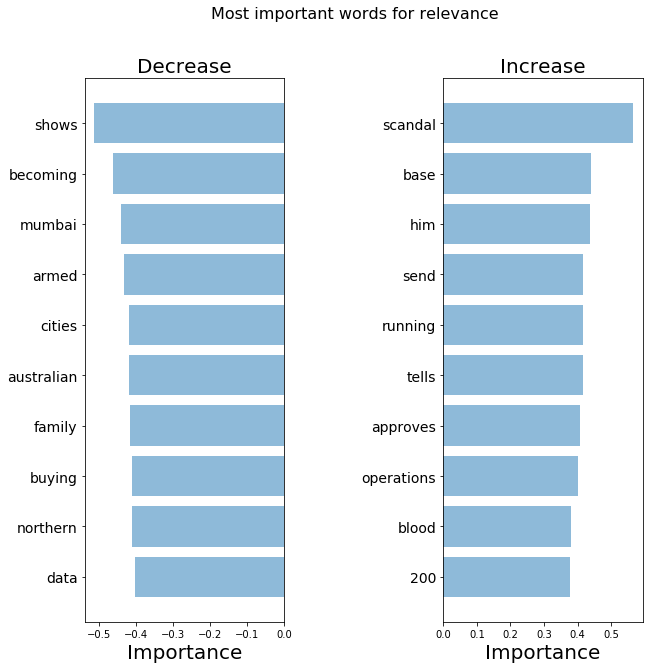

In [315]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

TFIDF Bag of Words
Let's try a slightly more subtle approach. On top of our bag of words model, we use a TF-IDF (Term Frequency, Inverse Document Frequency) which means weighing words by how frequent they are in our dataset, discounting words that are too frequent, as they just add to the noise.

In [316]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

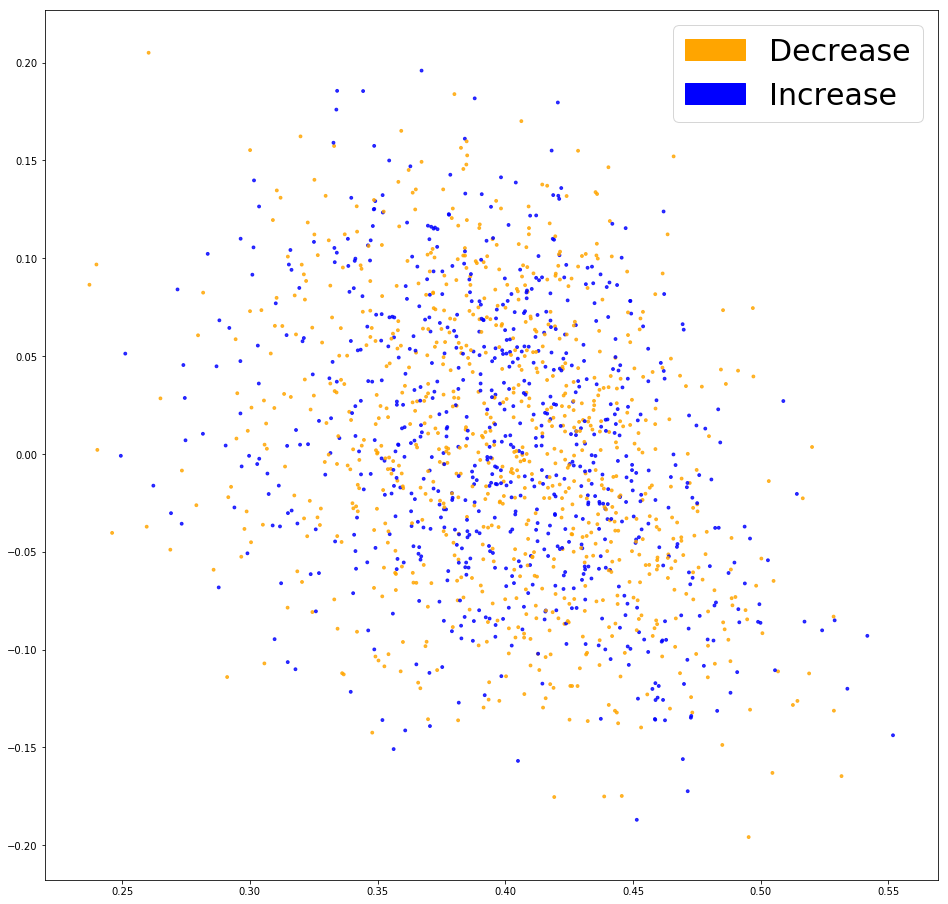

In [317]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [318]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [319]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.508, precision = 0.505, recall = 0.508, f1 = 0.504


In [320]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
print(cm)

[[117  89]
 [109  83]]


Slight improvement

In [321]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

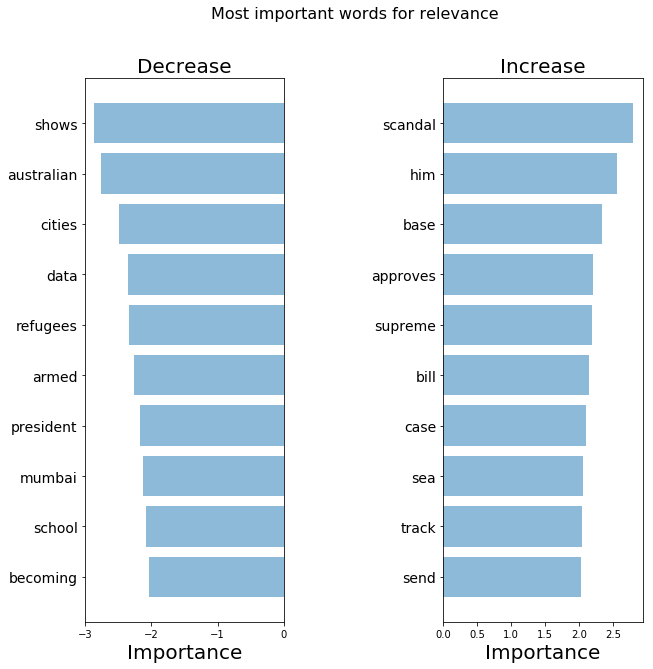

In [322]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

We can see a slightly increase in words that cause decrease in stock.


# Semantic Meaning
Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar close to each other. A quick way to get a sentence embedding for our classifier, is to average word2vec scores of all words in our sentence.

In [323]:
#import gensim


word2vec_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

#from gensim import models

#w = models.KeyedVectors.load_word2vec_format(
   # '../GoogleNews-vectors-negative300.bin', binary=True)

In [324]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [325]:
embeddings = get_word2vec_embeddings(word2vec, NewsFull)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)


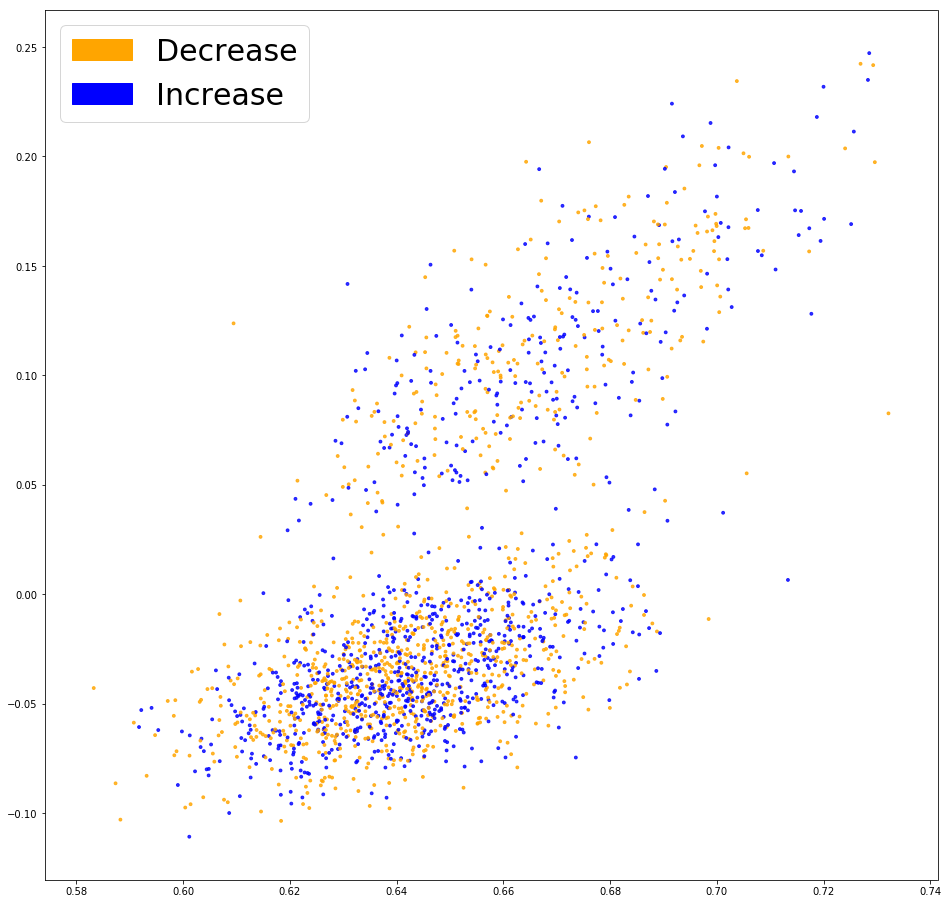

In [326]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()


In [327]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [328]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.492, precision = 0.492, recall = 0.492, f1 = 0.492


In [329]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
print(cm_w2v)

[[106 100]
 [102  90]]


In [330]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [331]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["Decrease","Increase", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [230]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: Increase


In [332]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: Increase


In [333]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Decrease',
    1: 'Increase'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

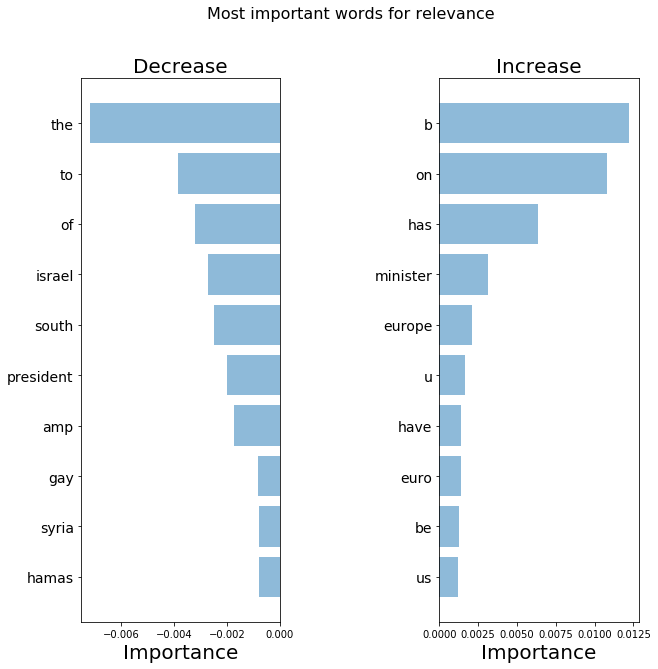

In [334]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Increase']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Increase']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Increase']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Increase']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [11]:
#creating a list of contractions from python 
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [162]:
headlines=[]
for row in Newsdf.iterrows():
    #daily_headlines = []
    date = row[1]['Date']
    headlines.append(row[1]['Top1'])

In [159]:
headlines

['A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.',
 'Jamaica proposes marijuana dispensers for tourists at airports following legalisation: The kiosks and desks would give people a license to purchase up to 2 ounces of the drug to use during their stay',
 'Explosion At Airport In Istanbul',
 '2,500 Scientists To Australia: If You Want To Save The Great Barrier Reef, Stop Supporting Coal',
 'Barclays and RBS shares suspended from trading after tanking more than 8%',
 'David Cameron to Resign as PM After EU Referendum',
 'Today The United Kingdom decides whether to remain in the European Union, or leave',
 'German government agrees to ban fracking indefinitely',
 'An Australian athlete who has competed in six Paralympic Games has been robbed at gunpoint in the Brazilian city of Rio de Janeiro. Liesl Tesch said a man brandishing a gun pushed her off her

In [74]:
# Clean the headlines
clean_headlines = []

#for daily_headlines in headlines:
    #clean_daily_headlines = []
for headline in headlines:
    clean_headlines.append(clean_text(headline))
    #clean_headlines.append(clean_daily_headlines)

In [75]:
# Take a look at some headlines to ensure everything was cleaned well
clean_headlines[0]

'year old woman mexico city finally received birth certificate died hours later trinidad alvarez lira waited years proof born'

In [76]:
clean_headlines

['year old woman mexico city finally received birth certificate died hours later trinidad alvarez lira waited years proof born',
 'imf chief backs athens permanent olympic host',
 'president france says brexit donald trump',
 'british man must give police hours notice sex threatens hunger strike man subject sexual risk order despite never convicted crime',
 'nobel laureates urge greenpeace stop opposing gmos',
 'brazil huge spike number police killings rio ahead olympics',
 'austria highest court annuls presidential election narrowly lost right wing candidate',
 'facebook wins privacy case track belgian wants matter internet users logged facebook',
 'switzerland denies muslim girls citizenship refuse swim boys school year old longer considered naturalised citizenship complied school curriculum authorities basel said',
 'china kills millions innocent meditators organs report finds',
 'france cracks factory farms viral video campaign moved govt act footage shared widely online animals wr

In [50]:
Newsdf.iloc[32602]

Date                                           2012-12-04
News    "MI6 passed up an opportunity to kill a senior...
Name: 32602, dtype: object

In [51]:
from sklearn.cluster import KMeans

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_headlines)

In [81]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
import numpy as np

In [83]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
terms

['00',
 '000',
 '000000',
 '000000000',
 '000000000000',
 '000000000000000',
 '00021',
 '000ft',
 '000kg',
 '000lbs',
 '000new',
 '000s',
 '000sq',
 '000th',
 '000x',
 '001',
 '002',
 '004',
 '00am',
 '00pm',
 '01',
 '011',
 '017',
 '02',
 '020',
 '0220',
 '03',
 '030',
 '035',
 '037',
 '04',
 '040',
 '045',
 '049',
 '04am',
 '05',
 '053',
 '058',
 '06',
 '060',
 '07',
 '077',
 '07baku1268',
 '08',
 '080',
 '083',
 '089',
 '08baku671',
 '09',
 '094',
 '0m',
 '0s',
 '0xomar',
 '10',
 '100',
 '10000',
 '100000th',
 '10000s',
 '1000s',
 '1000x',
 '100b',
 '100bn',
 '100ds',
 '100ft',
 '100k',
 '100m',
 '100mil',
 '100million',
 '100mw',
 '100s',
 '100th',
 '100x',
 '101st',
 '104m',
 '105',
 '105f',
 '105k',
 '1061c',
 '107d',
 '10am',
 '10bars',
 '10bn',
 '10cm',
 '10gbps',
 '10gw',
 '10in',
 '10k',
 '10kg',
 '10m',
 '10million',
 '10s',
 '10th',
 '10x',
 '10yr',
 '10yrs',
 '11',
 '110',
 '110bn',
 '110m',
 '111',
 '111th',
 '114',
 '115',
 '115m',
 '116bn',
 '117k',
 '119th',
 '11b',
 '

In [67]:
for i in range(true_k):
 print(“Cluster %d:” % i),
 for ind in order_centroids[i, :10]:
 print(‘ %s’ % terms[ind])

SyntaxError: invalid character in identifier (<ipython-input-67-865f01cac787>, line 2)